## SWMAL Exercise


### O4 Project - Identifying fake bank notes

In this notebook, we will describe our process for creating a model that can identify fake bank notes.
It will be based on the following steps:
1. Finding and importing the dataset
2. Visualizing the dataset
3. Preprocessing the dataset
4. Creating the model
5. Evaluating the model
8. Conclusion

### Finding the dataset
We will use a dataset [we found on Kaggle](https://www.kaggle.com/datasets/chrizzles/swiss-banknote-conterfeit-detection). The dataset is a collection of data points measured from different metrics of bank notes. There are real and fake bank notes in the dataset. The goal of the project is to create a model that can identify the fake from the real bank notes. 

The dataset contains the following features:
- counterfeit: a boolean value indicating whether the bank note is counterfeit or not (0 real, 1 fake)
- Length of note: the length of the bank note (mm)
- Left: Width of the left edge (mm)
- Right: Width of the right edge (mm)
- Bottom: Bottom margin width (mm)
- Top: Top margin width (mm)
- Diagonal: Diagonal length (mm)

We will use SKLearn for all the machine learning in the exercise, as well as data processing.

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

Let's load in the data

In [45]:
banknoteData = pd.read_csv("banknotes.csv", thousands=',')

Let's take a look at the data

In [46]:
banknoteData.describe()

,counterfeit,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.500000,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.501255,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,0.000000,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,0.000000,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,0.500000,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,1.000000,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,1.000000,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


In [47]:
banknoteData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   counterfeit  200 non-null    int64  
 1   Length       200 non-null    float64
 2   Left         200 non-null    float64
 3   Right        200 non-null    float64
 4   Bottom       200 non-null    float64
 5   Top          200 non-null    float64
 6   Diagonal     200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


Now let's visualize the features in the dataset.

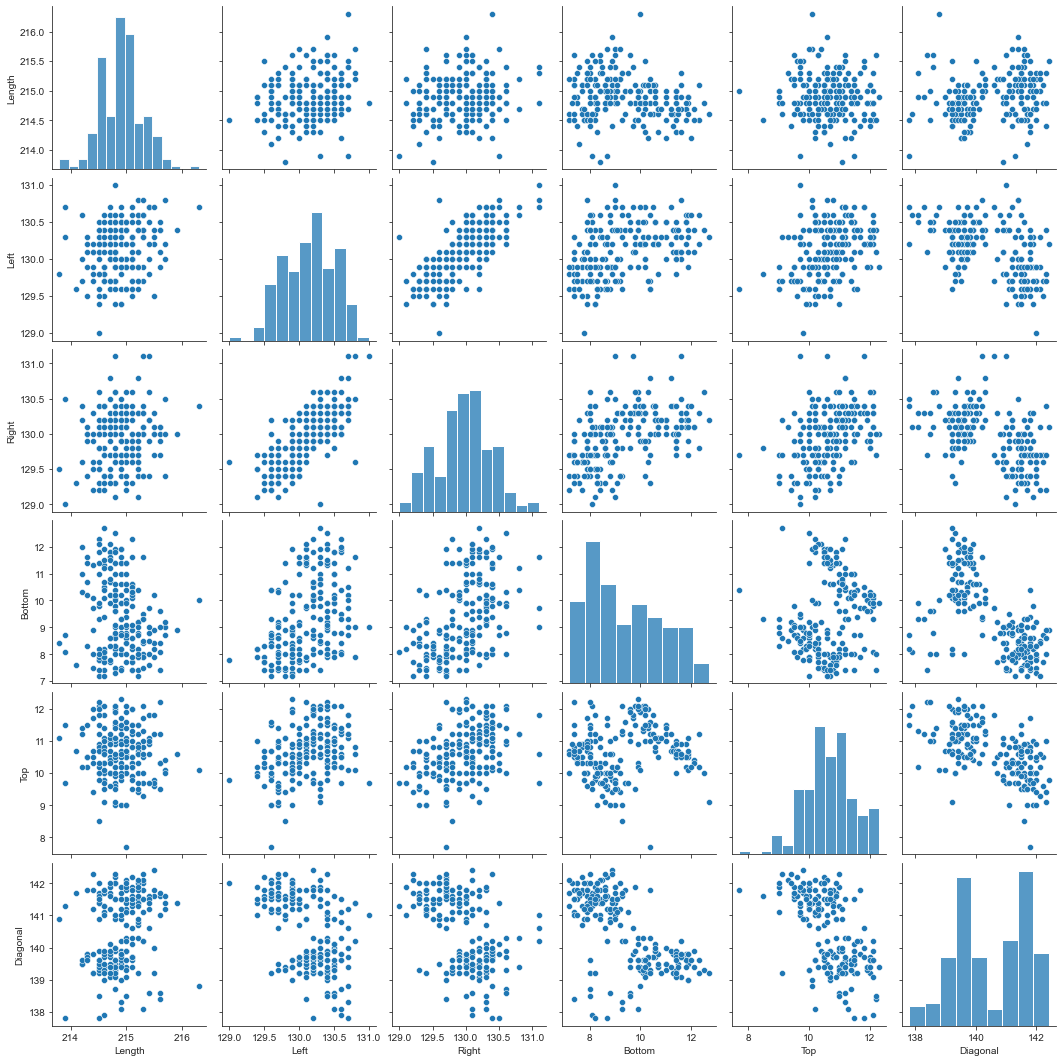

In [48]:
sns.set_style('ticks')
banknoteDataSansCounterfeit = banknoteData.drop(['counterfeit'], axis=1)
sns.pairplot(banknoteDataSansCounterfeit)
plt.show()

Some of the feature pairs can relatively easily be divided into two groups. For example, the length of the diagonal compared to the top margin.
However, some of the pairs are more tricky to distinguish and even if we could, we are uncertain which are fake and which are real.

Therefore, we will create another plot, this time colouring in the data points based on whether they are real or fake.

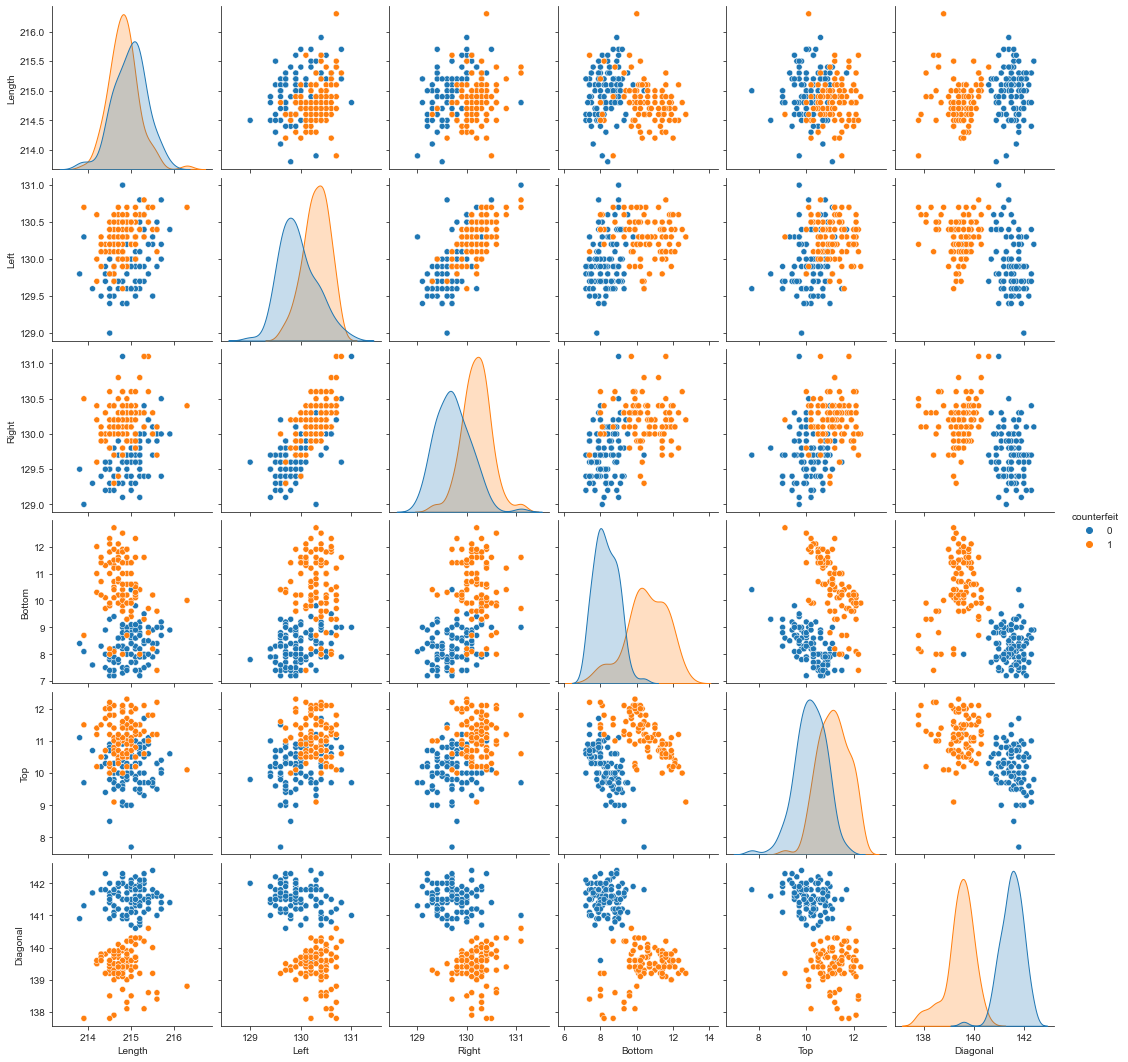

In [49]:
sns.set_style('ticks')
sns.pairplot(banknoteData, hue='counterfeit')
plt.show()

The pairplot function from seaborn gives a very nice visualization of the data. It makes spotting the differences between the real and the fake notes much easier. We also note how in some features, the difference is quite large. For example, the diagonal length of the real notes is almost 2 mm larger. In other features, the difference is comparatively small. For example, the over all length is almost entirely the same.

We will split the dataset into our x and y parts.

In [50]:
X = banknoteData.drop(columns = "counterfeit")
y = banknoteData["counterfeit"]
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: counterfeit, Length: 200, dtype: int64


### Preprocessing the dataset
Next up, we want to preprocess the dataset.
First we will split up the data into train and test sets.
Then we will scale the data.

Split the dataset into train and test sets.
Then scale the data.

In [51]:
banknoteData = banknoteData.reindex(np.random.permutation(banknoteData.index))

X = banknoteData.drop(columns = "counterfeit")
y = banknoteData["counterfeit"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

### Creating our (first) model
In this section, we will create a model that can identify fake bank notes.
At first, we felt that since our data was binary, we would use a binary classifier.

In [52]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Create the model
pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('sgd', SGDClassifier())
    ]
)
# Train the model
pipe.fit(X_train, y_train)
# Predict the class of the new data
classPred = pipe.predict(X_test)
print(pipe.score(X_test, y_test))

0.9642857142857143


### Evaluating the model
The model seemed pretty good from the initial score we saw. However, we want to really verify the results. 

To do this, we want to test the precision, recall, and f1 score of our model. As well as taking a look at the accuracy and confusion matrix.

SKLearn has a very nifty tool for this, called the classification report. It gives us a lot of information about our model. The only thing lacking is the confusion matrix. This we will create using the confusion_matrix function. We will also create a heatmap of the confusion matrix, based on the code from exercise "Performance Metrics".

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cMatrix = confusion_matrix(y_test, classPred)
class_report = classification_report(y_test, classPred)
acc = accuracy_score(y_test,classPred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",cMatrix)
print("\nAccuracy\n",acc)

Classification report:

               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.96      0.97      0.96        69

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

Confusion Matrix
 [[68  3]
 [ 2 67]]

Accuracy
 0.9642857142857143


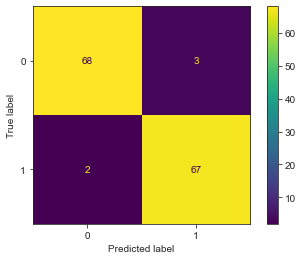

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cMatrix, display_labels=['0', '1'])

disp.plot()
plt.show()

### Creating our second model
After finishing the first model, we were uncertain as to how reliable that model was. We decided to try a second model. This time, we used the logistic regressor classifier which is another type of classifer.

In [55]:
from sklearn.linear_model import LogisticRegression
# Create the model
pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('log', LogisticRegression())
    ]
)
# Train the model
pipe.fit(X_train, y_train)
# Predict the class of the new data
regPred = pipe.predict(X_test)
print(pipe.score(X_test, y_test))

0.9928571428571429


### Evaluating the model
This model also seemed pretty good from the initial score. However, like before, we want to properly verify the results. 

Again, we want to take a look at the precision, recall, and f1 score as well as taking a look at the accuracy and confusion matrix.

We'll use the same procedure as before.

In [56]:
cMatrix = confusion_matrix(y_test, regPred)
class_report = classification_report(y_test, regPred)
acc = accuracy_score(y_test,regPred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",cMatrix)
print("\nAccuracy\n",acc)

Classification report:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.99      1.00      0.99        69

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140

Confusion Matrix
 [[70  1]
 [ 0 69]]

Accuracy
 0.9928571428571429


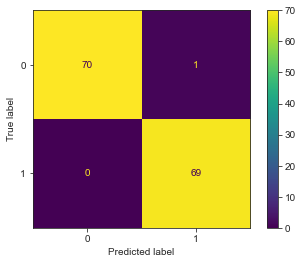

In [57]:
disp = ConfusionMatrixDisplay(cMatrix, display_labels=['0', '1'])

disp.plot()
plt.show()